In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
df = pd.read_csv("drifter_6hour_qc_723d_ea19_204a.csv").iloc[1:,]




/var/folders/_5/11xd0y1933x0r9fb35p9hqvh0000gp/T/ipykernel_85204/3624517412.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("drifter_6hour_qc_723d_ea19_204a.csv").iloc[1:,]


In [ ]:
len(df.ID.unique())

28706

In [ ]:
df.dtypes

ID           float64
time          object
latitude      object
longitude     object
lon360        object
sst           object
err_sst       object
ve           float64
vn           float64
err_lat      float64
err_lon      float64
dtype: object

100%|██████████| 99/99 [00:01<00:00, 59.44it/s]


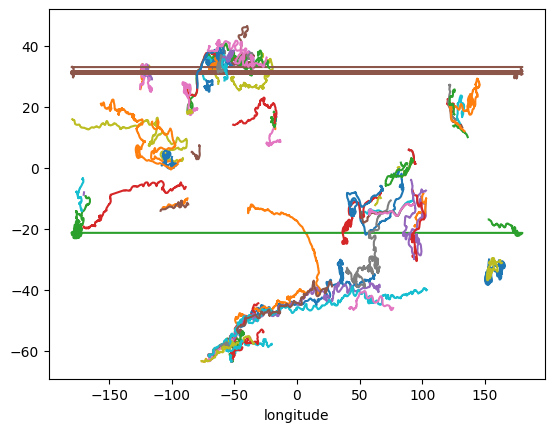

In [ ]:


ax = df[df.ID == df.ID.iloc[0]][["latitude", "longitude"]].astype(float).plot(y="latitude", x = "longitude", legend=False)

for unique_id in tqdm(df.ID.unique()[1:100:]):
    ax = df[df.ID == unique_id][["latitude", "longitude"]].astype(float).plot(ax=ax, y="latitude", x = "longitude", legend=False)

plt.show()

In [ ]:
df.ID.unique()[0:10:]

array([100962., 100963., 100964., 100965., 100966., 100967., 100968.,
       100969., 100970., 100971.])

100%|██████████| 28706/28706 [09:50<00:00, 48.59it/s]


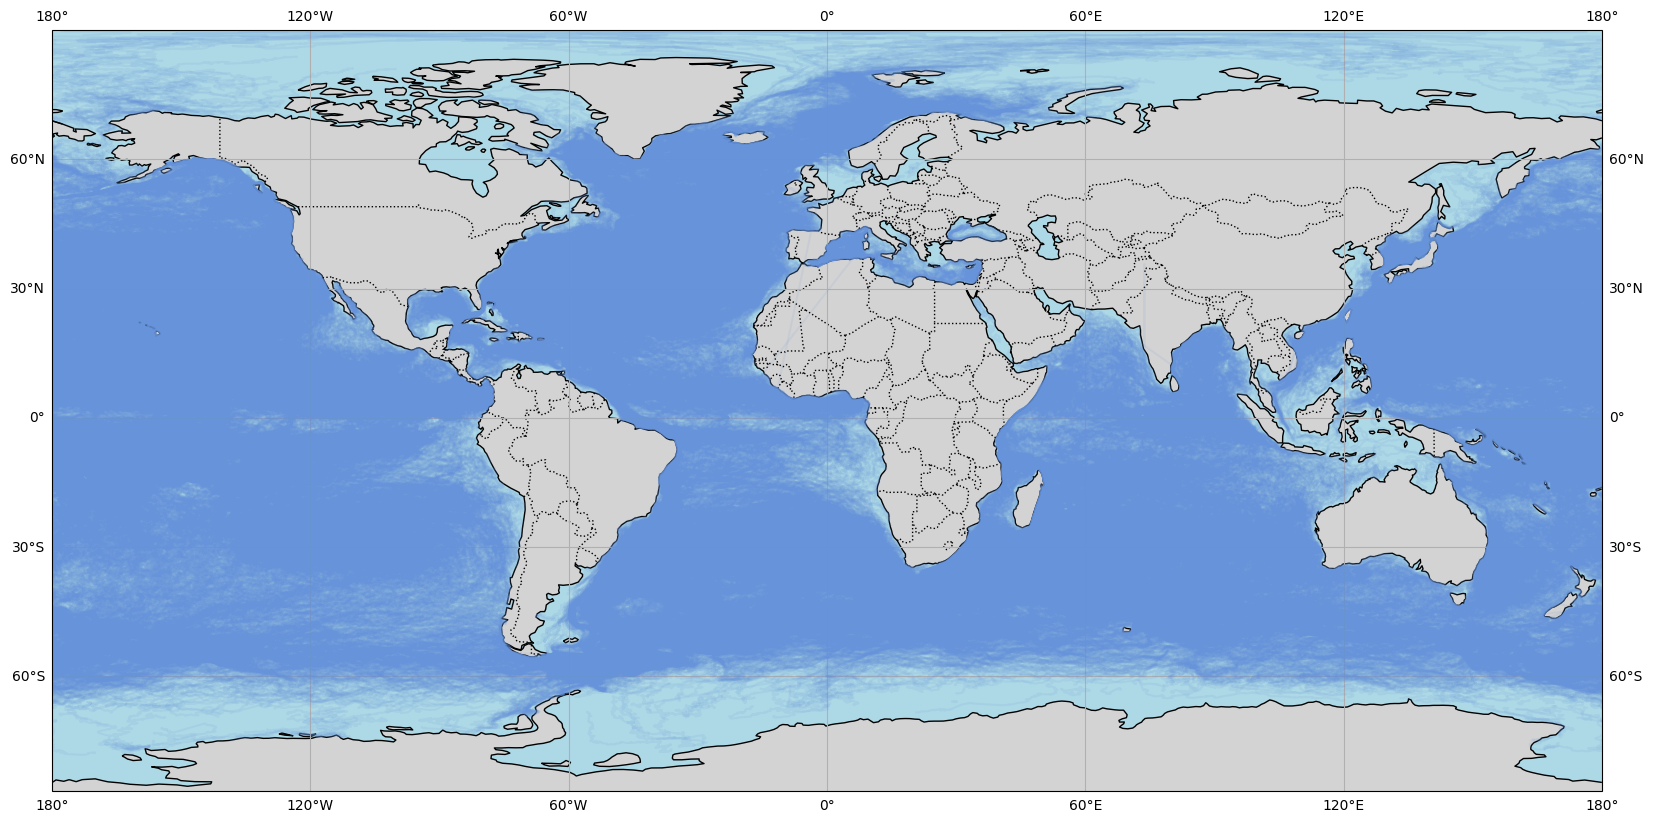

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Step 1: Create the figure and ax with a geographic projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Step 2: Add a basic world map
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Optional: gridlines
ax.gridlines(draw_labels=True)

# Step 3: Set the extent (optional - to zoom into a specific region)
# ax.set_extent([-180, 180, -90, 90])  # global view

# Step 4: Plot your data (replace these with your actual data)
for unique_id in tqdm(df.ID.unique()[0::1]):
    slice_df = df[df.ID == unique_id][["latitude", "longitude"]].astype(float)
    longitudes = slice_df['longitude'].to_numpy()
    latitudes = slice_df['latitude'].to_numpy()
    
    jumps = np.abs(np.diff(longitudes))
    split_indices = np.where(jumps > 180)[0] + 1
    
    lon_segments = np.split(longitudes, split_indices)
    lat_segments = np.split(latitudes, split_indices)

    for idx, lon_segment in enumerate(lon_segments):
        ax.plot(lon_segment, lat_segments[idx], transform=ccrs.PlateCarree(), color=(20/256, 148/256, 219/256,0.05))  # 'ro' for red dots

    # ax = df[df.ID == unique_id][["latitude", "longitude"]].plot(ax=ax, y="latitude", x = "longitude", legend=False)


plt.savefig("Drifter Plot.png")


In [ ]:
# Do you know how to get the opereator? which operator? the Helmholtz-Hodge projection. i.e Hessian - diagonal Hessian if your using pytorch you'll want everything as autograd vairables anyway so might be inbuilt somehow

In [ ]:
import torch
from torch.autograd.functional import hessian
Rwen4 = lambda r: ((1-r)**6 * (35* r**2 + 18 * r + 3)).sum() # Wendland 4 from https://arxiv.org/pdf/2504.01913
sample_r = torch.rand(5, requires_grad=True)

div_free = hessian(Rwen4,sample_r)
div_free = div_free - torch.diag(div_free)

In [ ]:
div_free

tensor([[  0.0000, -20.5220,  15.6923,  -9.6483, -21.3850],
        [-14.0791,   0.0000,  15.6923,  -9.6483, -21.3850],
        [-14.0791, -20.5220,   0.0000,  -9.6483, -21.3850],
        [-14.0791, -20.5220,  15.6923,   0.0000, -21.3850],
        [-14.0791, -20.5220,  15.6923,  -9.6483,   0.0000]])